# Analysis: Arrests to Offenses

Workflow: 3 <br>
Goal: Run analysis on arrest / offenses ratio. <br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import crime_helper as ch

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', -1)

## Initial Setup

In [3]:
ARREST_FILE = 'data/arrest_tkm_state.csv'
EMPLOYMENT_FILE = 'data/employment_state.csv'
OFFENDER_FILE = 'data/offender_tkm_state.csv'
OFFENSE_FILE = 'data/offense_tkm_state.csv'
VICTIM_FILE = 'data/victim_tkm_state.csv'
STATE_FILE = 'data/lookup_state.csv'
REGION_FILE = 'data/lookup_region.csv'

In [4]:
state_df = pd.read_csv(STATE_FILE)
state_df.head()
state_df.info()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
region_code        58 non-null int64
state_abbr         58 non-null object
state_fips_code    57 non-null float64
state_id           58 non-null int64
state_name         58 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


In [5]:
region_df = pd.read_csv(REGION_FILE)
region_df

,region_code,region_desc,region_name
0,0,U.S. Territories,U.S. Territories
1,1,Region I,Northeast
2,2,Region II,Midwest
3,3,Region III,South
4,4,Region IV,West
5,99,Other,Other


In [6]:
state_full_df = pd.merge(state_df, region_df, how='inner', on='region_code')
state_full_df.head()

,region_code,state_abbr,state_fips_code,state_id,state_name,region_desc,region_name
0,4,AK,2.0,1,Alaska,Region IV,West
1,4,AZ,4.0,5,Arizona,Region IV,West
2,4,CA,6.0,6,California,Region IV,West
3,4,CO,8.0,7,Colorado,Region IV,West
4,4,HI,15.0,15,Hawaii,Region IV,West


In [7]:
state_clean_df = state_full_df.sort_values('state_abbr').reset_index()
state_clean_df = state_clean_df[['state_abbr', 'state_name', 'region_code', 'region_name']]
state_clean_df.head(10)
state_clean_df.info()

,state_abbr,state_name,region_code,region_name
0,AK,Alaska,4,West
1,AL,Alabama,3,South
2,AR,Arkansas,3,South
3,AS,American Samoa,99,Other
4,AZ,Arizona,4,West
5,CA,California,4,West
6,CO,Colorado,4,West
7,CT,Connecticut,1,Northeast
8,CZ,Canal Zone,99,Other
9,DC,District of Columbia,3,South


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
state_abbr     58 non-null object
state_name     58 non-null object
region_code    58 non-null int64
region_name    58 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


## Explore Arrests

In [8]:
arrest_df = pd.read_csv(ARREST_FILE)
arrest_df = arrest_df.rename(columns={'count': 'arrests'})
arrest_df.head()
arrest_df.info()

,state,year,gender,offense,arrests
0,AK,2000,female,aggravated-assault,194
1,AK,2000,female,arson,3
2,AK,2000,female,burglary,49
3,AK,2000,female,curfew,1
4,AK,2000,female,disorderly-conduct,221


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51102 entries, 0 to 51101
Data columns (total 5 columns):
state      51102 non-null object
year       51102 non-null int64
gender     51102 non-null object
offense    51102 non-null object
arrests    51102 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
arrest_total_df = arrest_df.groupby(['state', 'year']).sum().sort_values(['state', 'year'])
arrest_total_df = arrest_total_df.reset_index()
arrest_total_df.head()

,state,year,arrests
0,AK,2000,21354
1,AK,2001,20267
2,AK,2002,19818
3,AK,2003,22746
4,AK,2004,21027


In [10]:
arrest_year_df = arrest_total_df.groupby(['year']).count().sort_values(['year']) 
arrest_year_df = arrest_year_df.rename(columns={'arrests': 'row_count'})
arrest_year_df

,state,row_count
year,,
2000,48,48
2001,50,50
2002,50,50
2003,50,50
2004,50,50
2005,50,50
2006,50,50
2007,50,50
2008,50,50


## Explore Offenses

Conclusion: All states are not available.

In [11]:
offense_df = pd.read_csv(OFFENSE_FILE)
offense_df = offense_df.rename(columns={'count': 'offenses'})
offense_df.head()
offense_df.info()

,state,year,offense,offenses
0,AL,1991,aggravated-assault,21909
1,AL,1991,arson,92
2,AL,1991,burglary,47915
3,AL,1991,homicide,434
4,AL,1991,larceny,107142


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 4 columns):
state       7323 non-null object
year        7323 non-null int64
offense     7323 non-null object
offenses    7323 non-null int64
dtypes: int64(2), object(2)
memory usage: 228.9+ KB


In [12]:
offense_total_df = offense_df.loc[offense_df['year']>2000]
offense_total_df = offense_total_df.groupby(['state', 'year']).sum().sort_values(['state', 'year'])
offense_total_df = offense_total_df.reset_index()
offense_total_df.head()

,state,year,offenses
0,AL,2006,5036
1,AL,2007,5144
2,AL,2008,4876
3,AL,2009,4762
4,AL,2010,4524


In [13]:
offense_year_df = offense_total_df.groupby(['year']).count().sort_values(['year']) 
offense_year_df = offense_year_df.rename(columns={'offenses': 'row_count'})
offense_year_df

,state,row_count
year,,
2001,23,23
2002,24,24
2003,27,27
2004,31,31
2005,33,33
2006,35,35
2007,35,35
2008,36,36
2009,36,36


## Explore Victim

In [52]:
victim_df = pd.read_csv(VICTIM_FILE)
victim_df = victim_df.rename(columns={'count': 'victims'})
victim_df.head()
victim_df.info()

,state,year,offense,gender,victims
0,AL,1991,aggravated-assault,Male,11230
1,AL,1991,aggravated-assault,Female,9592
2,AL,1991,aggravated-assault,Unknown,1087
3,AL,1991,arson,Male,32
4,AL,1991,arson,Female,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21969 entries, 0 to 21968
Data columns (total 5 columns):
state      21969 non-null object
year       21969 non-null int64
offense    21969 non-null object
gender     21969 non-null object
victims    21969 non-null int64
dtypes: int64(2), object(3)
memory usage: 858.2+ KB


In [53]:
victim_total_df = victim_df.loc[victim_df['year']>2000]
victim_total_df = victim_total_df.groupby(['state', 'year']).sum().sort_values(['state', 'year'])
victim_total_df = victim_total_df.reset_index()
victim_total_df.head()

,state,year,victims
0,AL,2006,3250
1,AL,2007,3206
2,AL,2008,3132
3,AL,2009,3042
4,AL,2010,2996


## Explore Employment

In [14]:
employment_df = pd.read_csv(EMPLOYMENT_FILE)
employment_df.head()
employment_df.info()

,agency_ct,civilian_ct,year,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,pe_ct_per_1000,population,state_abbr,state_name,total_pe_ct
0,36,730.0,2010,474.0,106.0,580.0,256.0,1152.0,1408.0,2.79,711456,AK,Alaska,1988.0
1,35,710.0,2011,472.0,109.0,581.0,238.0,1215.0,1453.0,2.80,725910,AK,Alaska,2034.0
2,35,690.0,2012,453.0,109.0,562.0,237.0,1221.0,1458.0,2.75,735190,AK,Alaska,2020.0
3,33,634.0,2013,443.0,113.0,556.0,191.0,1248.0,1439.0,2.70,739005,AK,Alaska,1995.0
4,33,691.0,2014,456.0,116.0,572.0,235.0,1202.0,1437.0,2.71,740644,AK,Alaska,2009.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
agency_ct             459 non-null int64
civilian_ct           459 non-null float64
year                  459 non-null int64
female_civilian_ct    459 non-null float64
female_officer_ct     459 non-null float64
female_total_ct       459 non-null float64
male_civilian_ct      459 non-null float64
male_officer_ct       459 non-null float64
male_total_ct         459 non-null float64
pe_ct_per_1000        459 non-null float64
population            459 non-null int64
state_abbr            459 non-null object
state_name            459 non-null object
total_pe_ct           459 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 50.3+ KB


In [15]:
population_df = employment_df[['state_abbr', 'year', 'population']]
population_df.head()

,state_abbr,year,population
0,AK,2010,711456
1,AK,2011,725910
2,AK,2012,735190
3,AK,2013,739005
4,AK,2014,740644


In [16]:
population_df.groupby('year').count()

,state_abbr,population
year,,
2010,51,51
2011,51,51
2012,51,51
2013,51,51
2014,51,51
2015,51,51
2016,51,51
2017,51,51
2018,51,51


## Merge DataFrames

In [17]:
merge_1_df = pd.merge(arrest_total_df, offense_total_df, how='inner', on=['state', 'year'])
merge_1_df.head()
merge_1_df.info()

,state,year,arrests,offenses
0,AL,2006,99804,5036
1,AL,2007,122305,5144
2,AL,2008,130248,4876
3,AL,2009,118120,4762
4,AL,2010,85352,4524


<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 625
Data columns (total 4 columns):
state       626 non-null object
year        626 non-null int64
arrests     626 non-null int64
offenses    626 non-null int64
dtypes: int64(3), object(1)
memory usage: 24.5+ KB


In [21]:
merge_2_df = pd.merge(merge_1_df, state_clean_df, how='inner', left_on='state', right_on='state_abbr')
merge_2_df.head()

,state,year,arrests,offenses,state_abbr,state_name,region_code,region_name
0,AL,2006,99804,5036,AL,Alabama,3,South
1,AL,2007,122305,5144,AL,Alabama,3,South
2,AL,2008,130248,4876,AL,Alabama,3,South
3,AL,2009,118120,4762,AL,Alabama,3,South
4,AL,2010,85352,4524,AL,Alabama,3,South


In [22]:
merge_3_df = pd.merge(merge_2_df, population_df, how='inner', on=['state_abbr', 'year'])
merge_3_df.head()

,state,year,arrests,offenses,state_abbr,state_name,region_code,region_name,population
0,AL,2010,85352,4524,AL,Alabama,3,South,4792630
1,AL,2011,1676,4524,AL,Alabama,3,South,4815348
2,AL,2012,1597,4574,AL,Alabama,3,South,4834334
3,AL,2013,1807,5346,AL,Alabama,3,South,4845981
4,AL,2014,2480,4726,AL,Alabama,3,South,4861676


In [54]:
merge_4_df = pd.merge(merge_3_df, victim_total_df, how='inner', on=['state', 'year'])
merge_4_df.head()

,state,year,arrests,offenses,state_abbr,state_name,region_code,region_name,population,victims
0,AL,2010,85352,4524,AL,Alabama,3,South,4792630,2996
1,AL,2011,1676,4524,AL,Alabama,3,South,4815348,3054
2,AL,2012,1597,4574,AL,Alabama,3,South,4834334,3180
3,AL,2013,1807,5346,AL,Alabama,3,South,4845981,3326
4,AL,2014,2480,4726,AL,Alabama,3,South,4861676,2784


In [63]:
merge_df = merge_4_df[['region_name', 'state', 'year', 'arrests', 'offenses', 'victims', 'population']]
merge_df.head()
merge_df.shape

,region_name,state,year,arrests,offenses,victims,population
0,South,AL,2010,85352,4524,2996,4792630
1,South,AL,2011,1676,4524,3054,4815348
2,South,AL,2012,1597,4574,3180,4834334
3,South,AL,2013,1807,5346,3326,4845981
4,South,AL,2014,2480,4726,2784,4861676


(346, 7)

In [64]:
merge_df.region_name.value_counts()

South        121
Midwest      99 
West         65 
Northeast    61 
Name: region_name, dtype: int64

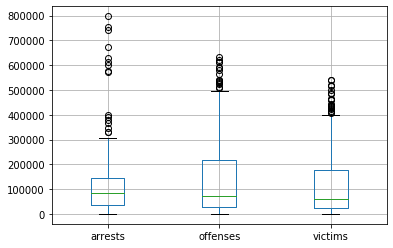

In [62]:
merge_df.boxplot(column=['arrests', 'offenses', 'victims'])

## Determine how good the data is

In [56]:
mean_df = merge_df.loc[merge_df['state']=='MD'].mean()
mean_df

year          2.017000e+03
arrests       1.312520e+05
offenses      2.014400e+04
victims       1.708800e+04
population    6.467609e+06
dtype: float64

In [57]:
mean_df['arrests']

131252.0

In [58]:
check_ls = []
for idx, row in state_df.iterrows():
    state = row['state_abbr']
    
    mean_df = merge_df.loc[merge_df['state']==state].mean()
    std_df = merge_df.loc[merge_df['state']==state].std()
    
    new_dx = {
        'state': state,
        'arrest_mean': round(mean_df['arrests'], 0),
        'arrest_std': round(std_df['arrests'], 0),
        'offense_mean': round(mean_df['offenses'], 0),
        'offense_std': round(std_df['offenses'], 0),
        'victim_mean': round(mean_df['victims'], 0),
        'victim_std': round(std_df['victims'], 0),
        'pop_mean': round(mean_df['population'], 0),
        'pop_std': round(std_df['population'], 0),
    }
    
    check_ls.append(new_dx)

In [59]:
check_df = pd.DataFrame(check_ls)
check_df.head()

,arrest_mean,arrest_std,offense_mean,offense_std,pop_mean,pop_std,state,victim_mean,victim_std
0,NaN,NaN,NaN,NaN,NaN,NaN,AK,NaN,NaN
1,46707.0,42688.0,3957.0,1324.0,4857763.0,38583.0,AL,2651.0,643.0
2,74564.0,4355.0,235783.0,22054.0,3077720.0,53321.0,AR,201608.0,18267.0
3,NaN,NaN,NaN,NaN,NaN,NaN,AS,NaN,NaN
4,199578.0,14257.0,17470.0,3823.0,6779069.0,254447.0,AZ,13710.0,3117.0


In [60]:
check_df['stat_arrest'] = check_df['arrest_std'] / check_df['arrest_mean']
check_df['stat_offense'] = check_df['offense_std'] / check_df['offense_mean']
check_df['stat_victim'] = check_df['victim_std'] / check_df['victim_mean']
check_df['stat_pop'] = check_df['pop_std'] / check_df['pop_mean']

check_df = check_df[['state', 'stat_arrest', 'stat_offense', 'stat_victim', 'stat_pop']]
check_df

,state,stat_arrest,stat_offense,stat_victim,stat_pop
0,AK,NaN,NaN,NaN,NaN
1,AL,0.913953,0.334597,0.242550,0.007943
2,AR,0.058406,0.093535,0.090607,0.017325
3,AS,NaN,NaN,NaN,NaN
4,AZ,0.071436,0.218832,0.227352,0.037534
5,CA,NaN,NaN,NaN,NaN
6,CO,0.026027,0.106590,0.097768,0.030712
7,CT,0.142296,0.052020,0.065246,0.015293
8,CZ,NaN,NaN,NaN,NaN
9,DC,0.202911,0.217457,0.221719,0.052630


## Create 3 period Dataframes

In [26]:
merge_df.groupby(['region_name', 'year']).count()[['state']]

state
region_name year       
Midwest     2010  10   
            2011  10   
            2012  10   
            2013  11   
            2014  11   
            2015  11   
            2016  12   
            2017  12   
            2018  12   
Northeast   2010  6    
            2011  6    
            2012  7    
            2013  7    
            2014  7    
            2015  7    
            2016  7    
            2017  7    
            2018  7    
South       2010  13   
            2011  13   
            2012  13   
            2013  13   
            2014  13   
            2015  13   
            2016  14   
            2017  14   
            2018  15   
West        2010  7    
            2011  7    
            2012  7    
            2013  7    
            2014  7    
            2015  7    
            2016  7    
            2017  7    
            2018  9

In [ ]:
period_0405_df = combined_df.loc[combined_df['year'].between(2004, 2005)]
period_0405_df.head()
period_0405_df.shape

In [ ]:
period_1112_df = combined_df.loc[combined_df['year'].between(2011, 2012)]
period_1112_df.head()
period_1112_df.shape

In [ ]:
period_1718_df = combined_df.loc[combined_df['year'].between(2017, 2018)]
period_1718_df.head(10)
period_1718_df.shape

In [ ]:
# examine number of counts per region

period_0405_df.groupby(['region_name']).count()[['state', 'year']]
period_1112_df.groupby(['region_name']).count()[['state', 'year']]
period_1718_df.groupby(['region_name']).count()[['state', 'year']]

In [ ]:
save_path = r'data/crime_data_full.csv'
merge_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'